#Importing Libraries.

In [ ]:
import numpy as np
import pandas as pd

#Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
Y = Y.reshape(-1,1)  # 1D to 2D list

In [ ]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


#Dealing with Invalid Dataset.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [ ]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


# Encoding dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
le6.classes_ = np.array(['No', 'Yes'])
Y = le6.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(X)
print('\n')
print(Y)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


[0 0 0 ... 0 0 0]


#Feature Scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


#Splitting Dataset into Trainig set and Test set



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=31, stratify=Y)
#x_train is the independant variable of my train data and Y_train is the dependant variable of training data
#and all others as well

In [ ]:
print(X_train)

[[ 1.63096955 -0.09138642 -0.46422926 ... -0.02957658 -0.47288208
  -0.52979545]
 [ 0.36591527  1.69913528  3.13016142 ...  2.51337498  2.5613834
  -0.52979545]
 [ 0.50647685 -0.75105231 -0.57699446 ... -0.80486669 -0.56040897
  -0.52979545]
 ...
 [-1.32082378 -0.92382195 -1.76102904 ... -1.45611038 -1.71284634
   1.88752093]
 [ 0.92816162  0.09708955 -0.11183802 ...  0.26503366 -0.04983545
  -0.52979545]
 [-1.25054299 -1.9761461  -1.1831074  ... -1.33206396 -1.0855703
  -0.52979545]]


In [ ]:
print(Y_train)

[0 0 0 ... 0 0 0]


# Training MODEL.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
classifier.score(X_train, Y_train)

0.8415371923552867

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators= 100, random_state=0, class_weight='balanced')
classifier1.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [ ]:
classifier1.score(X_train, Y_train)

99.98968788670425

In [ ]:
y_prdict = classifier1.predict(X_test)

In [ ]:
print(y_prdict)

[1 1 0 ... 0 0 0]






#Inversing le6 encoding

In [ ]:
#y_prdict = le6.inverse_transform(y_prdict)
y_prdict = np.where(y_prdict==0,'No','Yes')

In [ ]:
print(y_prdict)

['Yes' 'Yes' 'No' ... 'No' 'No' 'No']


In [ ]:
print(Y_test)

[1 1 0 ... 0 0 0]


In [ ]:
Y_test = le6.inverse_transform(Y_test)

In [ ]:
print(Y_test)

['Yes' 'Yes' 'No' ... 'No' 'No' 'No']


In [ ]:
Y_test = Y_test.reshape(-1,1)
y_prdict = y_prdict.reshape(-1,1)

In [ ]:
print(Y_test)

[['Yes']
 ['Yes']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [ ]:
print(y_prdict)

[['Yes']
 ['Yes']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [ ]:
df = np.concatenate((Y_test, y_prdict), axis=1)
dataframe = pd.DataFrame(df, columns = ['Rain on Tomorrow', 'Prdeiction of Rain'])

In [ ]:
print(dataframe)

      Rain on Tomorrow Prdeiction of Rain
0                  Yes                Yes
1                  Yes                Yes
2                   No                 No
3                   No                 No
4                  Yes                Yes
...                ...                ...
29087               No                Yes
29088               No                 No
29089               No                 No
29090               No                 No
29091               No                 No

[29092 rows x 2 columns]


# Calculating Accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_prdict)

0.8528117695586416

In [ ]:
dataframe.to_csv('prediction.csv')

#Prediction on user provided data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Corrected column alignment
columns = [
    "Location", "MinTemp", "MaxTemp", "Rainfall", "WindGustDir", "WindGustSpeed",
    "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
    "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
    "Temp9am", "Temp3pm", "RainToday"
]

# Define new data with proper alignment
# Replace placeholders with valid data
new_data = pd.DataFrame([[
    "Uluru",    # Replace with actual location (must exist in training data)
    24.7,        # MinTemp
    32.9,        # MaxTemp
    2.2,         # Rainfall
    "NE",         # Replace with actual wind gust direction (must exist in training data)
    30.0,        # WindGustSpeed
    "ENE",         # Replace with actual wind direction at 9am
    "SSE",        # Replace with actual wind direction at 3pm
    15.0,        # WindSpeed9am
    9.0,        # WindSpeed3pm
    74,        # Humidity9am
    10,        # Humidity3pm
    1008.0,      # Pressure9am
    1004.0,      # Pressure3pm
    3,     # Replace with actual cloud cover at 9am
    7,  # Replace with actual cloud cover at 3pm
    28.1,        # Temp9am
    32.0,        # Temp3pm
    "Yes"
]], columns=columns)

# Impute missing values (if any)
imputer = SimpleImputer(strategy='most_frequent')
new_data = imputer.fit_transform(new_data)

# Handle unseen labels
def safe_transform(encoder, values):
    known_classes = encoder.classes_
    return [value if value in known_classes else "Unknown" for value in values]

# Update LabelEncoder instances to include "Unknown" if necessary
for encoder in [le1, le2, le3, le4, le5, le6]:
    if "Unknown" not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, "Unknown")

# Apply LabelEncoder transformations
new_data[:, 0] = le1.transform(safe_transform(le1, new_data[:, 0]))  # Location
new_data[:, 4] = le2.transform(safe_transform(le2, new_data[:, 4]))  # WindGustDir
new_data[:, 6] = le3.transform(safe_transform(le3, new_data[:, 6]))  # WindDir9am
new_data[:, 7] = le4.transform(safe_transform(le4, new_data[:, 7]))  # WindDir3pm
new_data[:, 14] = le5.transform(safe_transform(le5, new_data[:, 14]))  # Cloud9am
new_data[:, 15] = le6.transform(safe_transform(le6, new_data[:, 15]))  # Cloud3pm
new_data[:, -1] = le6.transform(safe_transform(le6, new_data[:, -1]))  # RainToday

# Convert new_data to float
new_data = new_data.astype(float)

# Scale the features
new_data = sc.transform(new_data)

# Predict using the trained model
prediction = classifier1.predict(new_data)

print(prediction)
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
target_encoder.classes_ = np.array(['No', 'Yes'])
# Decode the prediction
decoded_prediction = target_encoder.inverse_transform(prediction)

#Output the prediction
print("Predicted Rain for Tomorrow:", decoded_prediction[0])



[0]
Predicted Rain for Tomorrow: No


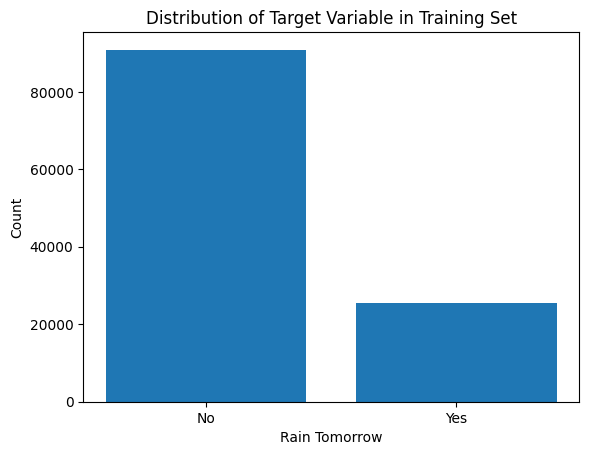

In [ ]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
unique, counts = np.unique(Y_train, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique, ['No', 'Yes'])
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.title('Distribution of Target Variable in Training Set')
plt.show()